# Clean & Analyze Employee Exit Surveys

### It is said that about 50% of a data scientist's job is spent on cleaning and transforming data.  Hence the motivation for this project. 

### Two data sets ( Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia) are read in, cleaned, transformed, combined and then analyzed. At the end, the following questions will be answered: 1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?  2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?  There are 10 parts to this project.

## Part 1: Read in data files, examine data

### In this first part, we will examine the two datasets, and highlight aspects of the datasets that are problematical and in need of cleaning and/or transformation.  This first part identifies the problems in the datasets that need to be addressed, providing for a more coherent project.

### start off with DETE data set first

In [105]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [106]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [107]:
dete_survey.shape

(822, 56)

In [108]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

### The above column names of the DETE dataset will be compared to the column names of the TAFE dataset below

In [109]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

### Note that there are 3 different categories for Resignation as a separation type in the DETE dataset

In [110]:
dete_survey['DETE Start Date'].isnull().sum()

0

In [111]:
dete_survey['Cease Date'].isnull().sum()

0

In [112]:
print(dete_survey['DETE Start Date'].value_counts())

Not Stated    73
2011          40
2007          34
2008          31
2012          27
2010          27
2009          24
2006          23
1970          21
2013          21
1975          21
1990          20
2005          20
1999          19
1996          19
2004          18
1992          18
1991          18
2000          18
1989          17
2003          15
2002          15
1988          15
1976          15
1978          15
1997          14
1974          14
1995          14
1998          14
1980          14
1979          14
1993          13
1986          12
1972          12
1977          11
1971          10
1994          10
1969          10
1984          10
2001          10
1983           9
1981           9
1985           8
1973           8
1987           7
1963           4
1982           4
1968           3
1967           2
1966           1
1965           1
Name: DETE Start Date, dtype: int64


In [113]:
print(dete_survey['Cease Date'].value_counts(dropna=False))

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
02/2014         2
04/2014         2
04/2013         2
08/2012         2
07/2014         2
09/2010         1
2010            1
09/2014         1
2014            1
11/2012         1
07/2012         1
07/2006         1
Name: Cease Date, dtype: int64


### As can be seen above, the 'Cease Date' and the 'DETE Start Date' columns of the DETE dataset have 34 and 73 'Not Stated' values respectively, in addition to 0 and 34 NaN values respectively.   

### That concludes DETE processing for Part 1.  Now we will examine the TAFE dataset

In [114]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [115]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [116]:
tafe_survey.shape

(702, 72)

In [117]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

In [118]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].isnull().sum()

106

### in addition to a fair amount (106) NaN values, the Length of Service column of TAFE dataset includes text mixed with numeric characters, numeric ranges and just plain numbers as an object data type.  This will have to be cleaned in the future

In [119]:
tafe_survey['Record ID'].isnull().sum()

0

In [120]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

### Compared to the 'SeparationType' column of the DETE dataset, this 'Reason for ceasing employment' column of the TAFE dataset only has one category for Resignations.  Furthermore, the column names will have to be adjusted for consistency and to allow for the eventual combining of the two datasets

In [121]:
tafe_survey['Reason for ceasing employment'].isnull().sum()

1

In [122]:
tafe_survey['Reason for ceasing employment'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
697    False
698    False
699    False
700    False
701    False
Name: Reason for ceasing employment, Length: 702, dtype: bool

In [123]:
tafe_survey['Record ID'].value_counts()

6.342194e+17    1
6.349929e+17    1
6.342081e+17    1
6.345951e+17    1
6.341719e+17    1
               ..
6.348914e+17    1
6.342080e+17    1
6.349520e+17    1
6.342684e+17    1
6.341820e+17    1
Name: Record ID, Length: 702, dtype: int64

In [124]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

### Compare the above column names of TAFE with those of the DETE dataset.  Note the differences in capitalization, the presence or absence of the '.' character, in addition to the different nomenclature.  Column names will have to be adjusted so that the two datasets are consistent in order to prepare for combining the two datasets.

### Summary of Part 1:  Both datasets have an enormous number of columns, and there does not seem to be a column the two dataframes can easily merge on.  Many columns include NaN values, other columns include 'Not Stated' as a response, which is constructively a null value.  Tafe has a length of service column, Dete does not, but it can be calculated by subtracting Dete start date from Cease date columns.  Both dataframes include reasons for leaving (i.e. separation type), cease date, employees age and gender.  Both dataframes include information on whether employee was dissatisfied, but in different forms.  Both data sets include a column showing reason for separation, but have different column names and one data set has 3 categories for a resignation while the other just one.  This analysis should highlight the need for some of the cleaning and transformation steps that will now occur

## Part 2:  Drop unwanted columns, convert 'Not Stated' entries to NaN

In [125]:
#here, 'Not Stated' entries are read in as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey.shape
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

### compare the above .info() printout for the DETE dataset to the one at the beginning of the project.  Note how the number of non-null values for each of the 'Cease Date' and 'DETE Start Date' columns have dropped due to the above read which converted 'Not Stated' entries to null values

### Below, we will create new dataframes dete_survey_updated and tafe_survey_updated from dete_survey and tafe_survey respectively where unwanted columns are removed

In [126]:
# here, a bulk of not needed columns of both dataframes are eliminated
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [127]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [128]:
dete_survey.shape

(822, 56)

In [129]:
dete_survey_updated.shape

(822, 35)

In [130]:
tafe_survey.shape

(702, 72)

In [131]:
tafe_survey_updated.shape

(702, 23)

### Summary of Part 2:  Note the drop in the number of column numbers.  Also, the number of NaN values have increased for the 'Cease Date' and 'DETE Start Date' columns of the DETE dataset by characterizing 'Not Stated' entries as null values.  New dataframes dete_survey_updated and tafe_survey_updated are formed where unwanted columns from dete_survey and tafe_survey respectively are dropped

## Part 3:  Modify column names
### Capitalization issues, punctuation issues, and different nomenclature differ in the column names of the two datasets.  This Part 3 will address this so that the column names of the two data sets can be more consistent with each other by converting to a snake case to put them in better condition for combining and analysis

In [132]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

### In one statement below, 1) periods are eliminated, 2) leading and trailing spaces are eliminated, 3) consecutive spaces are eliminated, 4) internal spaces are replaced with underscores, and 5) all characters are put into lower case in the column names of the DETE dataset

In [133]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.lower().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [134]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

### In the code below, column names of the TAFE dataset are renamed using a dictionary

In [135]:
colrename = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns = colrename)

In [136]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [137]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [138]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Summary of Part 3:  Column names of both datasets were changed using different techniques so that the column names of each dataset are consistent with each other, are in snake case, and are in better condition for a subsequent combining and analysis steps

## Part 4:  Screen for 'separationtypes' that include the word 'Resignation' 
###  In this part, new dataframes 'dete_resignations' and 'tafe_resignations' are formed that only contain rows of dete_survey_updated and tafe_survey_updated respectively of where the employee separated due to a resignation (i.e. rows where separationtype column includes the word 'Resignation').  This eliminates separations that were not characterized as a resignation of some type

In [139]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [140]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [141]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na = False)].copy()

In [142]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [143]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


### Summary of Part 4: New dataframes dete_resignations and tafe_resignations were constructed containing only rows where the 'separationtype' column included the word 'Resignation'.

## Part 5:  Cleaning Cease and Start Dates

In [144]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [145]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

### Note the inconsistencies in the formatting of the 'cease date' of the DETE dataset.  Some entries include months and slashes, some do not.  Because we are only interested in the year and not the month or slashes, we will clean this so that only years are present, and convert the data type of this column from object to float

In [146]:
pattern =r"([1-2][0-9][0-9][0-9])"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

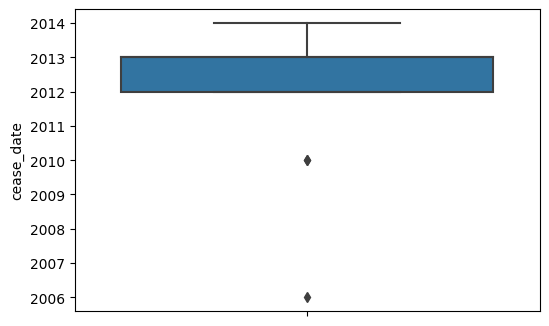

In [147]:
import seaborn
seaborn.boxplot(y = dete_resignations['cease_date'])

### 'cease date' column of 'dete_resignations' cleaned and standardized. 
### Now lets examine the 'dete_start_date' column

In [148]:
print(dete_resignations['dete_start_date'].value_counts())

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64


In [149]:
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending = True))

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


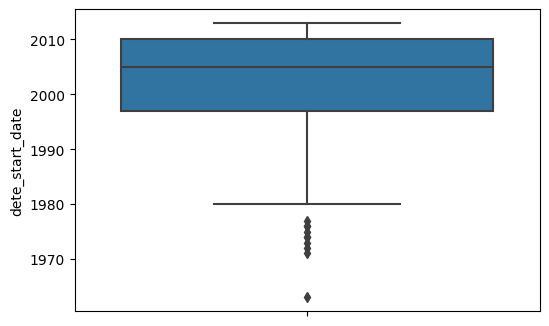

In [150]:
import seaborn
seaborn.boxplot(y = dete_resignations['dete_start_date'])

### 'dete_start_date' column looks acceptable, many outliers of start dates in the 1960's and 1970's
### Now lets examine 'cease_date' column of the 'tafe_resignations' dataframe:

In [151]:
print(tafe_resignations['cease_date'].value_counts())

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


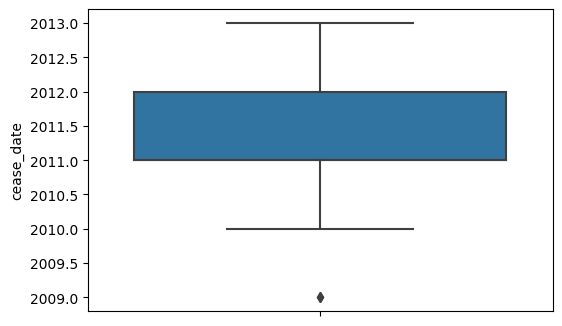

In [152]:
import seaborn
seaborn.boxplot(y = tafe_resignations['cease_date'])

###  'cease_date' column of the 'tafe_resignations' dataframe looks acceptable
## Part 6:  Add a years of service (i.e. 'institute_service') column to dete_resignations dataframe to make consistent with same column in tafe_resignations dataframe

In [153]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [154]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [155]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

### The above column name printout shows that the TAFE dataset includes a 'institute_service' column showing years of service of the employee, while the DETE dataset fails to include this column.
### we will fix that by calculating a 'institute_service' column for the DETE dataset from the 'cease_date' and 'dete_start_date' columns

In [156]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts().sort_index(ascending = True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

### Summary Part 6:  It appears that the new 'institute_service' column of dete_resignations dataframe is complete and comparable with that of the 'institute_service' column in tafe_resignations.  Now these two dataframes are in better condition for being combined and analyzed

## Part 7:  Identify (and create new column) showing whether employees were dissatisfied. 
### Specifically, we want to create a new column 'dissatisfied' for each of the dete_resignations and tafe_resignations dataframes that is determined from other column entries.  This column will summarize, as a binary, whether the employee who resigned was or was not dissatsified with his or her job
### We begin with the TEFE dataset and notice it includes 2 columns ('Contributing Factors. Dissatisfaction' & 'Contributing Factors. Job Dissatisfaction') that determine whether the employee was dissatisfied

In [157]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [158]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

### the above show that these two columns of the TEFE dataset include 3 possible values, 1) NaN, 2) '-' and 3) a recital of the column name.  A recital of the column name entry shows dissatisfaction, a '-' shows no dissatisfaction, and NaN shows no data value entry

### A new column 'dissatisfied' is fromed from these 2 columns.  This is accomplished by creating a 'update_vals' function that is applied to these 2 columns using applymap() to create a boolean series.  If one of these 2 columns has a True entry, 'dissatisfied' will get a True entry, if both columns are False, 'dissatisfied' will be set to False, and if they contain NaN, then 'dissatisfied' column will get NaN

In [159]:
def update_vals(val):
    if (pd.isnull(val)):
        #print('the')
        return np.nan
    elif val == '-':
        return False
    else:
        return True
tafe_copy1 = tafe_resignations.copy()
tafe_bool = tafe_copy1[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
       

### A new dataframe tafe_resignations_up is created that includes the 'dissatisfied' column as a boolean series

In [160]:
tafe_resignations_up = tafe_resignations.copy()
tafe_bool['dissatisfied'] = tafe_bool.any(axis=1, skipna = False)
tafe_bool.head(30)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,dissatisfied
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False
10,False,False,False
13,False,False,False
14,True,True,True


In [161]:
tafe_resignations.head(30)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10


In [162]:
tafe_resignations_up['dissatisfied'] = tafe_bool['dissatisfied']
tafe_resignations_up.head(30)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2,False
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True


### As can be seen above, the newly created tafe_resignations_up dataframe includes a column called 'dissatisfied' that includes boolean values to summarize the 'Contributing Factors. Dissatisfaction' & 'Contributing Factors. Job Dissatisfaction' columns

### Now we will create a 'dissatisfied' column for the DETE dataset.  Unlike the TAFE dataset, DETE's 'dissatisfied' column is derived from a large number of columns: job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload'.  If any of these columns is answered in the affirmative (i.e. True), 'dissatisfied' for that employee will be set to 'True' to indicate that the resigning employee was dissatisfied with his or her job

In [163]:
cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
dete_resignations['dissatisfied'] = dete_resignations[cols].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].head(30)

3     False
5      True
8     False
9      True
11    False
12    False
14     True
16     True
20    False
21    False
22     True
23     True
25     True
27    False
33     True
34     True
37    False
39     True
40    False
41     True
42    False
43     True
48    False
50    False
51    False
55    False
57    False
61    False
69     True
71    False
Name: dissatisfied, dtype: bool

In [164]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [165]:
dete_resignations_up = dete_resignations.copy()

### Summary of Part 7:  New dataframes tafe_resignations_up and dete_resignations_up were created with a new column 'dissatisfied' which is derived from other columns in the corresponding datasets and has a boolean value for each row to show whether or not the employee was dissatisfied with his or her job.  Now that both dataframes have similar columns, we can now proceed to combine the data frames

## Part 8:  Combine Dataframes

### prior to combining, we want to add a new column 'institute' to each dataframe to identify whether a particular row (i.e. employee) is from DETE or TAFE institute

In [166]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [167]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [168]:
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [169]:
dete_resignations_up.shape

(311, 38)

In [170]:
tafe_resignations_up.shape

(340, 25)

In [171]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True, join = 'outer')

In [172]:
combined.shape

(651, 53)

In [173]:
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

### Now that the dataframes have been combined using vertical concat, we notice that we still have a lot of columns (53 to be exact).  We will now weed these out by discarding columns with fewer than 500 non null entries (i.e. more than 150 Null entries)

In [175]:
combined_updated = combined.dropna(axis = 1, thresh = 500)

In [176]:
combined_updated.shape

(651, 10)

In [177]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


### Summary of Part 8:  Datasets combined, columns weeded out, now left with just a more managable 10 columns 

## Part 9:  Clean 'institute_service' column
### As can be seen below, the 'institute_service' column has many non numeric characters, and also includes ranges  We will first eliminate those, and then classify it into the following criteria:  'New' < 3 years, 'Experienced' between 3 and 7 years, 'Established' between 7 and 11 years and 'Veteran' being 11 years or more.  This new catagorized length of service will become a new column 'service_cat' in a new combined dataframe 'combined_updated' to identify length of service of each resignee

In [178]:
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [179]:
combined_updated['institute_service'].isnull().sum()

88

In [180]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


In [181]:
cs1 = combined_updated['institute_service'].astype('str')


### regular expression r'(\d+)' is used to extract digits 0-9 of unknown length

In [182]:
pattern = r'(\d+)'
cs2 = cs1.str.extract(pattern)

In [183]:
type(cs2)

pandas.core.frame.DataFrame

In [184]:
type(cs1)

pandas.core.series.Series

In [185]:
combined_updated['institute_service'].tail(60)

591                 1-2
592                 3-4
593                7-10
594                 3-4
595                 1-2
596                 NaN
597                 5-6
598                7-10
599                 NaN
600                 3-4
601                 5-6
602                 NaN
603                 5-6
604                 3-4
605                 5-6
606                 3-4
607                 5-6
608                 3-4
609                 3-4
610               11-20
611                 1-2
612    Less than 1 year
613    Less than 1 year
614                7-10
615                 5-6
616                7-10
617                 3-4
618                 1-2
619    Less than 1 year
620    Less than 1 year
621                 1-2
622                 3-4
623                 5-6
624                 NaN
625                 NaN
626                 3-4
627                 NaN
628    Less than 1 year
629    Less than 1 year
630                 1-2
631    Less than 1 year
632             

In [186]:
cs2.tail(60)

,0
591,1
592,3
593,7
594,3
595,1
596,NaN
597,5
598,7
599,NaN
600,3


In [187]:
cs3 = cs2.astype('float')
cs3.tail(60)

,0
591,1.0
592,3.0
593,7.0
594,3.0
595,1.0
596,NaN
597,5.0
598,7.0
599,NaN
600,3.0


In [188]:
cs3 = cs2.astype('float')
cs3.tail(60)

,0
591,1.0
592,3.0
593,7.0
594,3.0
595,1.0
596,NaN
597,5.0
598,7.0
599,NaN
600,3.0


### As can be seen above, cs3 includes a column '0' with just the numerical portion in float corresponding to the 'institute_service' column but without any text
### The next step is to classify each entry as either New, Experienced, Established or Veteran according to the above criteria.
### To do this, I will create a function 'servcat' that will take in the above float numbers and return one of the above categories.  Then, cs3[0] will be subjected to an .apply() where the function 'servcat' is passed to return a series of the above categories corresponding to the above floats.  This categorical series will become a new column 'service_cat' in the combined dataframe 'combined_update'

In [189]:
pd.set_option('mode.chained_assignment', None)
def servcat(val):
    if pd.isnull(val):
        return 'No Data'
    elif val < 3:
        return 'New'
    elif val < 7:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'
combined_updated['service_cat'] = cs3[0].apply(servcat)

In [190]:
combined_updated.head(60)

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE,Established
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE,Veteran
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE,Experienced
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE,Veteran
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE,Experienced
5,13.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,14,False,DETE,Veteran
6,15.0,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,31-35,5,True,DETE,Experienced
7,17.0,Resignation-Other reasons,2012.0,Teacher Aide,Permanent Part-time,Male,61 or older,NaN,True,DETE,No Data
8,21.0,Resignation-Other employer,2012.0,Teacher,Permanent Full-time,Male,56-60,30,False,DETE,Veteran
9,22.0,Resignation-Other reasons,2012.0,Cleaner,Permanent Part-time,Female,51-55,32,False,DETE,Veteran


### Summary for Part 9:  The 'institute_service' column of the combined dataframe was cleaned to rid of text and numerical ranges, converted to a numeric data type, and then categorized to become a new column 'service_cat' in combined dataframe 'combined_updated' to prepare for data analysis
## Part 10: Analysis

In [191]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

### As can be seen above, the 'dissatisfied' column contains 8 null values.  These will be filled in with False because False is the mean (i.e. there are more Falses than Trues in the dataset)

In [192]:
pd.set_option('mode.chained_assignment', None)
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(value = False)

In [193]:
combined_updated['dissatisfied'].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

### Now that the nulls of 'dissatisfied' column have been dealt with, we will see whether more senior employes in terms of length of service who had resigned are more or less likely to be dissatisfied than less senior (in terms of length of service) resignees 

In [194]:
table = pd.pivot_table(combined_updated, values = 'dissatisfied', index = 'service_cat')

In [195]:
table


,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
No Data,0.295455
Veteran,0.485294


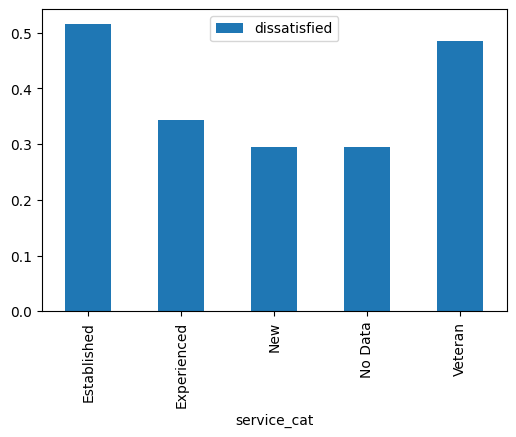

In [196]:
%matplotlib inline
table.plot(kind='bar')

### It appears that more senior (in terms of length of service) resignees are more disatisfied with their job than less senior resignees.  Perhaps the more senior resignees are more bored than new employees.  Perhaps the institutes are not treating them well or rewarding them adequately.

### Lets now compare dissatisfaction of resignees with age of resignees and see if there is a correlation

In [197]:
table = pd.pivot_table(combined_updated, values = 'dissatisfied', index = 'age')

In [198]:
table

,dissatisfied
age,
20 or younger,0.200000
21 25,0.303030
21-25,0.310345
26 30,0.250000
26-30,0.571429
31 35,0.218750
31-35,0.551724
36 40,0.281250
36-40,0.390244


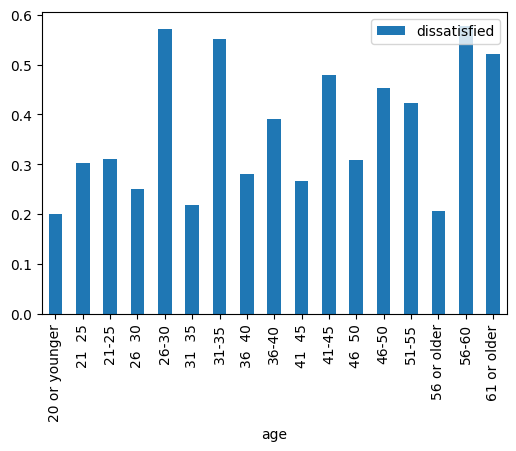

In [199]:
%matplotlib inline
table.plot(kind='bar')

### Not nearly as much of a correlation as we had with years of service.  It appears that years of service and not age is a best predictor of job dissatisfaction among resignees

### Lets now do the same with 'institute', i.e. whether they worked at DETE or TAFE

In [200]:
table = pd.pivot_table(combined_updated, values = 'dissatisfied', index = 'institute')

In [201]:
table

,dissatisfied
institute,
DETE,0.479100
TAFE,0.267647


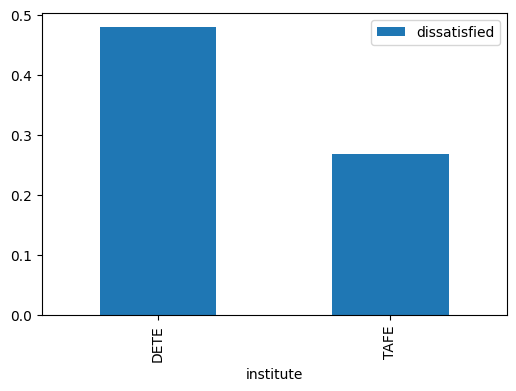

In [202]:
%matplotlib inline
table.plot(kind='bar')

### DETE resignees were far more dissatisfied than TAFE employees.  
### Now lets look at position of job

In [203]:
table = pd.pivot_table(combined_updated, values = 'dissatisfied', index = 'position')

In [204]:
table

,dissatisfied
position,
Administration (AO),0.216216
Business Service Manager,0.000000
Cleaner,0.487179
Executive (SES/SO),0.500000
Guidance Officer,1.000000
Head of Curriculum/Head of Special Education,0.500000
Operational (OO),0.230769
Other,0.666667
Professional Officer,0.000000


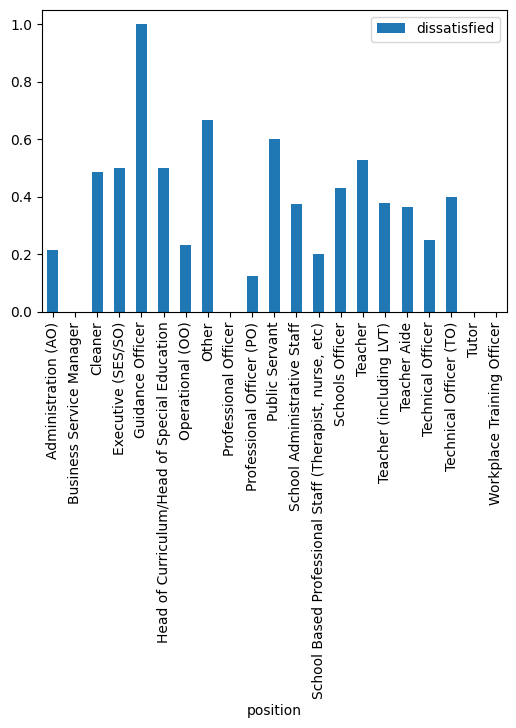

In [205]:
%matplotlib inline
table.plot(kind='bar')

### Dissatisfaction varied widely among position

## In conclusion, it seems that years of service and which institutute the employee worked at had greatest bearing on dissatisfaction, and employee age and gender had lesser bearing on dissatisfaction